In [2]:

import pandas as pd 
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import seaborn

%matplotlib inline

In [3]:
ccdf = pd.read_csv('creditcard.csv') 


In [4]:
ccdf.describe() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


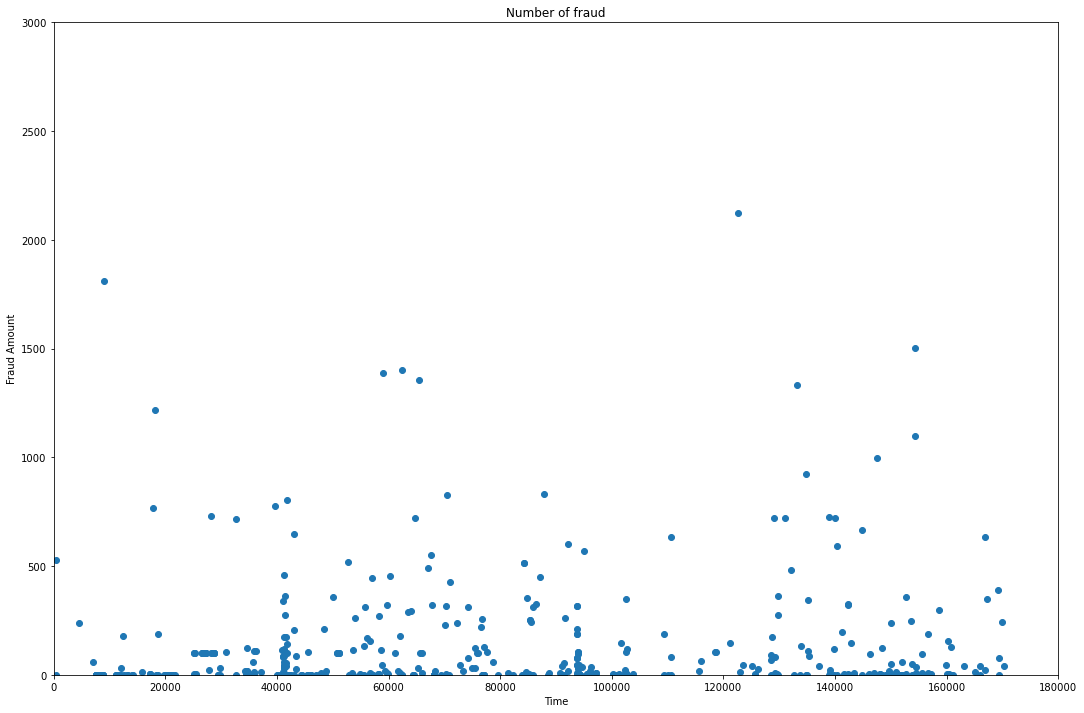

In [5]:
ccdf_fraud = ccdf[ccdf['Class'] == 1] 
plt.figure(figsize=(18,12))
plt.scatter(ccdf_fraud['Time'], ccdf_fraud['Amount']) 
plt.title('Number of fraud')
plt.xlabel('Time')
plt.ylabel('Fraud Amount')
plt.xlim([0,180000])
plt.ylim([0,3000])
plt.show()

In [6]:
fraud_amnt_comp = ccdf_fraud[ccdf_fraud['Amount'] > 100].shape[0] 
print('There are '+ str(fraud_amnt_comp) + ' number frauds where thefraud amount was greater than $100 out of ' + str(ccdf_fraud.shape[0]) + ' total frauds')

There are 130 number frauds where thefraud amount was greater than $100 out of 492 total frauds


In [7]:
fraud_amnt_comp = ccdf_fraud[ccdf_fraud['Amount'] > 500].shape[0] 
print('There are '+ str(fraud_amnt_comp) + 'number frauds where the fraud amount was greater than $500 out of ' + str(ccdf_fraud.shape[0]) + ' total frauds')

There are 35number frauds where the fraud amount was greater than $500 out of 492 total frauds


In [9]:
fraud_amnt_comp = ccdf_fraud[ccdf_fraud['Amount'] > 1000].shape[0] 
print('There are only '+ str(fraud_amnt_comp) + ' number frauds where thefraud amount was greater than $1000 out of ' + str(ccdf_fraud.shape[0]) + ' total frauds')

There are only 9 number frauds where thefraud amount was greater than $1000 out of 492 total frauds


In [10]:
total_number_fraud = len(ccdf[ccdf.Class == 1])
legit_transac = len(ccdf[ccdf.Class == 0])
print('There are only '+ str(total_number_fraud) + ' frauds in the original dataset, even though there are ' + str(legit_transac) +' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


# Correlation of features

In [11]:
df_corr = ccdf.corr() 
df_corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


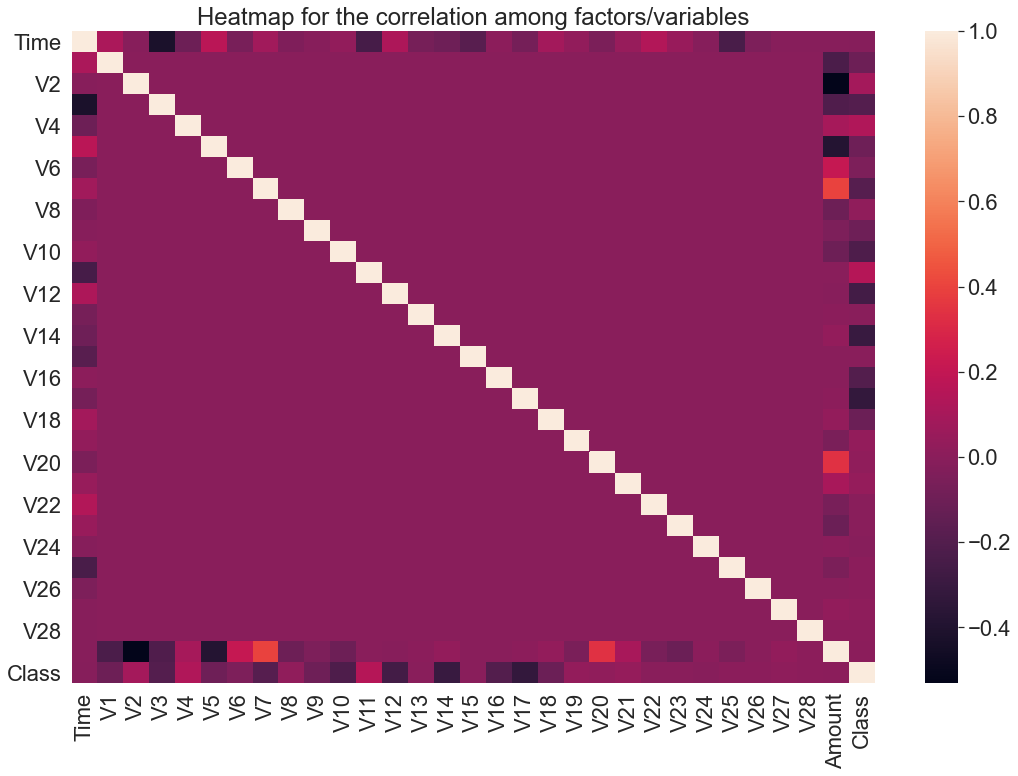

In [13]:
plt.figure(figsize=(18,12))
seaborn.heatmap(df_corr) 
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap for the correlation among factors/variables')
plt.show()

In [14]:
dfrank = df_corr['Class'] 
df_rank = pd.DataFrame(dfrank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) 
                                                                  
df_rank.dropna(inplace=True) 

In [18]:

df_train_alldf = ccdf[0:160000] 
df_train_1_label = df_train_alldf[df_train_alldf['Class'] == 1] 
df_train_0_label = df_train_alldf[df_train_alldf['Class'] == 0]
print('The dataset have ' + str(len(df_train_1_label)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0_label.sample(300)
df_train = df_train_1_label.append(df_sample)  
df_train = df_train.sample(frac=1)

The dataset have 356 frauds so we need to take a similar number of non-fraud


In [19]:
X_train = df_train.drop(['Time', 'Class'],axis=1) 
y_train = df_train['Class']
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [21]:
df_test_all = ccdf[140000:]

X_tst_a = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_tst_a = np.asarray(X_tst_a)
y_test_all = np.asarray(y_test_all)

In [22]:
X_train_rank = df_train[df_rank.index[1:11]] 
X_train_rank = np.asarray(X_train_rank)

In [23]:
X_tst_a_rank = df_test_all[df_rank.index[1:11]]
X_tst_a_rank = np.asarray(X_tst_a_rank)
y_test_all = np.asarray(y_test_all)

# Confusion Matrix

In [24]:
class_names=np.array(['0','1']) 
#Label, Class = 1 (fraud) and Class = 0 (no fraud)

In [25]:
def plt_conf_matrix(cmtfac, classes,
                          title='Confusion matrix',
                          cmtfacap=plt.cmtfac.Blues):
    
    plt.imshow(cmtfac, interpolation='nearest', cmtfacap=cmtfacap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cmtfac.max() / 2.
    for i, j in itertools.product(range(cmtfac.shape[0]), range(cmtfac.shape[1])):
        plt.text(j, i, format(cmtfac[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cmtfac[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
classifier = svm.SVC(kernel='linear') 

In [27]:
classifier.fit(X_train, y_train) 

SVC(kernel='linear')

In [28]:
prediction_SVM_all = classifier.predict(X_tst_a) 

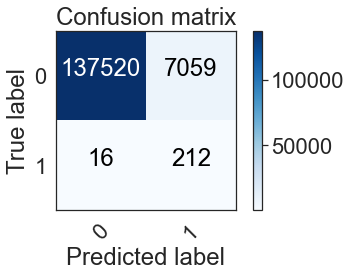

In [33]:
cmtfac = confusion_matrix(y_test_all, prediction_SVM_all)
plt_conf_matrix(cmtfac,class_names)

In [38]:
print('Our criterion give a result of ' 
      + str( ( (cmtfac[0][0]+cmtfac[1][1]) / (sum(cmtfac[0]) + sum(cmtfac[1])) + 4 * cmtfac[1][1]/(cmtfac[1][0]+cmtfac[1][1])) / 5))

Our criterion give a result of 0.9340880220605794


In [39]:
print('Detected ' + str(cmtfac[1][1]) + ' frauds / ' + str(cmtfac[1][1]+cmtfac[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cmtfac[1][1]/(cmtfac[1][1]+cmtfac[1][0])))
print("the accuracy is : "+str((cmtfac[0][0]+cmtfac[1][1]) / (sum(cmtfac[0]) + sum(cmtfac[1]))))

Detected 212 frauds / 228 total frauds.

So, the probability to detect a fraud is 0.9298245614035088
the accuracy is : 0.9511418646888617


In [41]:
classifier.fit(X_train_rank, y_train) 
prediction_SVM = classifier.predict(X_test_all_rank) 

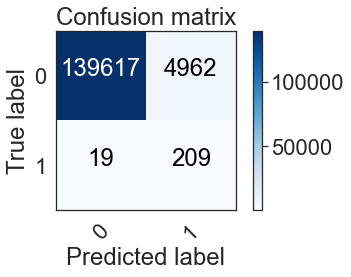

In [43]:
cmtfac = confusion_matrix(y_test_all, prediction_SVM)
plt_conf_matrix(cmtfac,class_names)

In [44]:
print('Our criterion give a result of ' 
      + str( ( (cmtfac[0][0]+cmtfac[1][1]) / (sum(cmtfac[0]) + sum(cmtfac[1])) + 4 * cmtfac[1][1]/(cmtfac[1][0]+cmtfac[1][1])) / 5))

Our criterion give a result of 0.9264538316517849


In [45]:
print('We have detected ' + str(cmtfac[1][1]) + ' frauds / ' + str(cmtfac[1][1]+cmtfac[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cmtfac[1][1]/(cmtfac[1][1]+cmtfac[1][0])))
print("the accuracy is : "+str((cmtfac[0][0]+cmtfac[1][1]) / (sum(cmtfac[0]) + sum(cmtfac[1]))))

We have detected 209 frauds / 228 total frauds.

So, the probability to detect a fraud is 0.9166666666666666
the accuracy is : 0.9656024915922573


In [46]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})

In [47]:
classifier_b.fit(X_train, y_train) 

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

In [49]:
prediction_SVM_b_all = classifier_b.predict(X_test_all) 

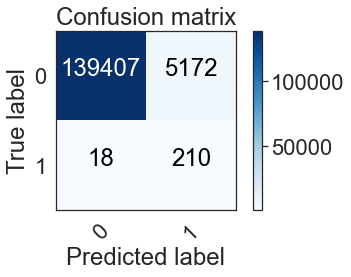

In [51]:
cmtfac = confusion_matrix(y_test_all, prediction_SVM_b_all)
plt_conf_matrix(cmtfac,class_names)

In [52]:
print('Result of ' 
      + str( ( (cmtfac[0][0]+cmtfac[1][1]) / (sum(cmtfac[0]) + sum(cmtfac[1])) + 4 * cmtfac[1][1]/(cmtfac[1][0]+cmtfac[1][1])) / 5))

Result of 0.929673943503022


In [53]:
print('We have detected ' + str(cmtfac[1][1]) + ' frauds / ' + str(cmtfac[1][1]+cmtfac[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cmtfac[1][1]/(cmtfac[1][1]+cmtfac[1][0])))
print("the accuracy is : "+str((cmtfac[0][0]+cmtfac[1][1]) / (sum(cmtfac[0]) + sum(cmtfac[1]))))

We have detected 210 frauds / 228 total frauds.

So, the probability to detect a fraud is 0.9210526315789473
the accuracy is : 0.9641591911993205


In [55]:
classifier_b.fit(X_train_rank, y_train) 
prediction_SVM = classifier_b.predict(X_test_all_rank) 

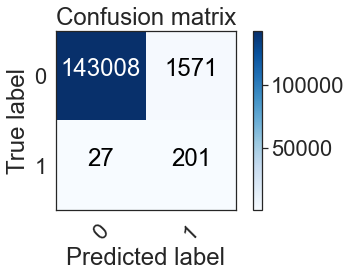

In [67]:
cmtfac = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cmtfac,class_names)

In [56]:
print('The model accuracy is ' 
      + str( ( (cmtfac[0][0]+cmtfac[1][1]) / (sum(cmtfac[0]) + sum(cmtfac[1])) + 4 * cmtfac[1][1]/(cmtfac[1][0]+cmtfac[1][1])) / 5))

The model accuracy is 0.929673943503022


In [59]:
print('We have detected ' + str(cmtfac[1][1]) + ' frauds among  ' + str(cmtfac[1][1]+cmtfac[1][0]) + ' total frauds.')
print('\n Therefore probability for this model to detect fraud is ' + str(cmtfac[1][1]/(cmtfac[1][1]+cmtfac[1][0])))
print("the accuracy is : "+str((cmtfac[0][0]+cmtfac[1][1]) / (sum(cmtfac[0]) + sum(cmtfac[1]))))

We have detected 210 frauds among  228 total frauds.

 Therefore probability for this model to detect fraud is 0.9210526315789473
the accuracy is : 0.9641591911993205
